51
100
105
256


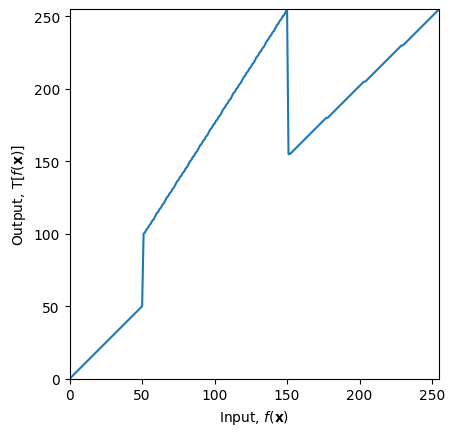

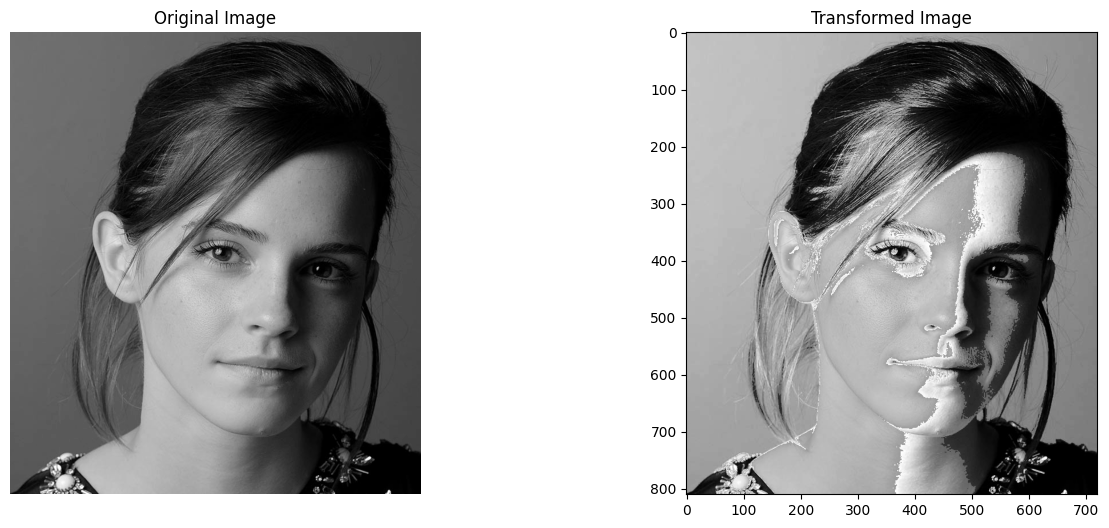

In [3]:
# Intensity Windowing
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


t1 = np.linspace(0, 50, 51).astype('uint8')
print(len(t1))
t2 = np.linspace(100, 255, 100).astype('uint8')
print(len(t2))
t3 = np.linspace(155, 255, 105).astype('uint8')
print(len(t3)) 
 
transform = np.concatenate((t1, t2, t3), axis=0).astype('uint8')
print(len(transform))

fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal') 
plt.show()


f = cv.imread('a1images/emma.jpg', cv.IMREAD_GRAYSCALE)
t = np.arange(256, dtype=np.uint8)
g = transform[f]
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].imshow(f, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[1].imshow(g, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Transformed Image')
for a in ax[0:1]:
    a.axis('off')

plt.show()

181
75
256
181
75
75
256


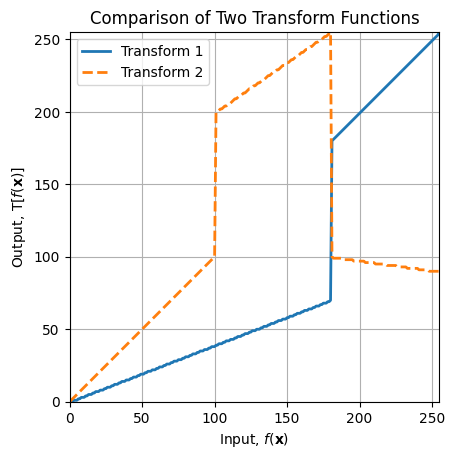

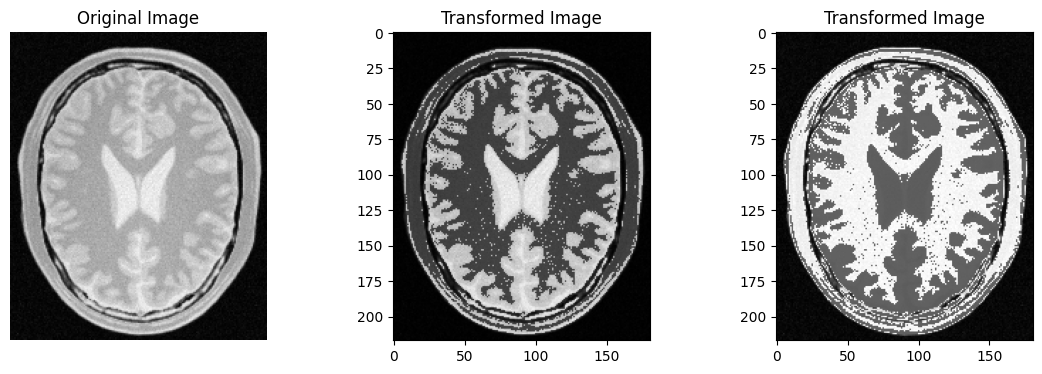

In [4]:
t1 = np.linspace(0, 70, 181).astype('uint8')
print(len(t1))
t2 = np.linspace(180, 255, 75).astype('uint8')
print(len(t2))
 
transform1 = np.concatenate((t1, t2), axis=0).astype('uint8')
print(len(transform1))

t3 = np.linspace(0, 100, 101).astype('uint8')
print(len(t1))
t4 = np.linspace(200, 255, 80).astype('uint8')
print(len(t2))
t5 = np.linspace(100, 90, 75).astype('uint8')
print(len(t2))

 
transform2 = np.concatenate((t3, t4, t5), axis=0).astype('uint8')
print(len(transform2))

fig, ax = plt.subplots()
ax.plot(np.arange(256), transform1, label='Transform 1', linestyle='-', linewidth=2)
ax.plot(np.arange(256), transform2, label='Transform 2', linestyle='--', linewidth=2)

ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel(r'Output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_aspect('equal')
ax.legend()
plt.grid(True)
plt.title("Comparison of Two Transform Functions")
plt.show()


f = cv.imread('a1images/brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)
t = np.arange(256, dtype=np.uint8)
g1 = transform1[f]
g2 = transform2[f]
fig, ax = plt.subplots(1, 3, figsize=(14, 4))
ax[0].imshow(f, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[1].imshow(g1, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Transformed Image')
ax[2].imshow(g2, cmap='gray', vmin=0, vmax=255)
ax[2].set_title('Transformed Image')
for a in ax[0:1]:
    a.axis('off')

plt.show()

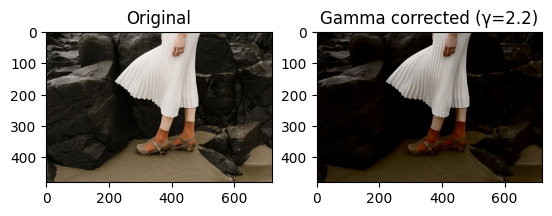

In [5]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load image
f = cv.imread('a1images/highlights_and_shadows.jpg')  # BGR image
lab = cv.cvtColor(f, cv.COLOR_BGR2LAB)
L, a, b = cv.split(lab)

# Normalize L to [0,1], apply gamma, then rescale back to [0,255]
L_float = L / 255.0
gamma = 2.2
L_corrected = np.power(L_float, gamma)
L_corrected = np.uint8(np.clip(L_corrected * 255.0, 0, 255))

# Merge and convert back to BGR
lab_corrected = cv.merge((L_corrected, a, b))
img_corrected = cv.cvtColor(lab_corrected, cv.COLOR_LAB2BGR)

# Show result
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(cv.cvtColor(f, cv.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.title("Gamma corrected (γ=2.2)")
plt.imshow(cv.cvtColor(img_corrected, cv.COLOR_BGR2RGB))
plt.show()


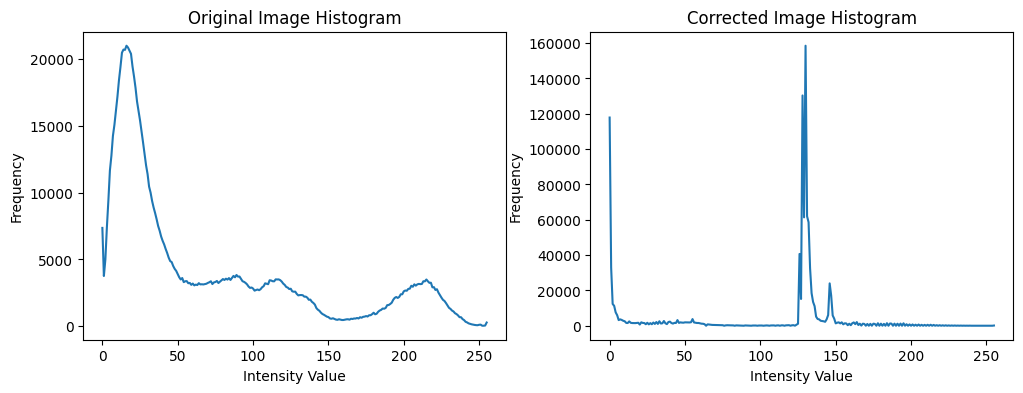

In [6]:
f = cv.cvtColor(f, cv.COLOR_BGR2RGB)
hist, bins = np.histogram(f.ravel(), 256, [0, 256])
hist2, bins2 = np.histogram(lab_corrected.ravel(), 256, [0, 256])
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].plot(hist)
ax[0].set_title('Original Image Histogram')
ax[0].set_xlabel('Intensity Value')
ax[0].set_ylabel('Frequency')
ax[1].plot(hist2)
ax[1].set_title('Corrected Image Histogram')
ax[1].set_xlabel('Intensity Value')
ax[1].set_ylabel('Frequency')
plt.show()



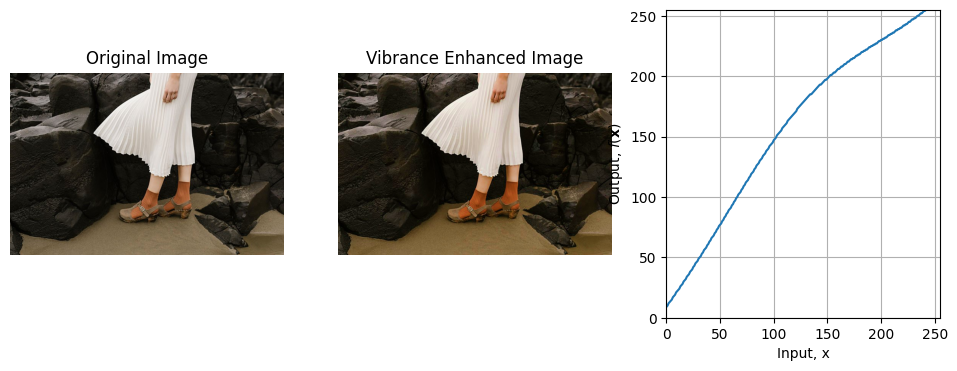

In [21]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Read and convert
f = cv.imread('a1images/highlights_and_shadows.jpg')  # BGR image
hsv = cv.cvtColor(f, cv.COLOR_BGR2HSV)
h, s, v = cv.split(hsv)

# Parameters
a = 0.4   # vibrance amount, in [0,1]
sigma = 70.0

# Transformation on saturation
S_transformed = s.astype(np.float32) + a * 128 * np.exp(-((s.astype(np.float32) - 128)**2) / (2 * sigma**2))
S_transformed = np.clip(S_transformed, 0, 255).astype(np.uint8)

# Merge back into HSV and convert to RGB
hsv[:, :, 1] = S_transformed
g = cv.cvtColor(hsv, cv.COLOR_HSV2RGB)

# Show transformed color image
fig, ax = plt.subplots(1,3, figsize=(12, 4))
ax[0].imshow(cv.cvtColor(f, cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(g)
ax[1].set_title('Vibrance Enhanced Image')
ax[1].axis('off')

x_vals = np.arange(256, dtype=np.float32)
transform = x_vals + a * 128 * np.exp(-((x_vals - 128)**2) / (2 * sigma**2))
transform = np.clip(transform, 0, 255).astype(np.uint8)

ax[2].plot(transform)
ax[2].set_xlabel(r'Input, x')
ax[2].set_ylabel(r'Output, $f(\mathbf{x})$')
ax[2].set_xlim(0, 255)
ax[2].set_ylim(0, 255)
plt.grid(True)

plt.show()

